# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [2]:
data = pd.read_csv("Salary Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Data Cleaning 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [9]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [11]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [13]:
data.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

# Data Preprocessing

In [15]:
# Numerical Columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical Columns: {list(numerical_cols)}")

Numerical Columns: ['Age', 'Years of Experience', 'Salary']


In [17]:
# Numerical Columns
numerical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(numerical_cols)}")

Categorical Columns: ['Gender', 'Education Level', 'Job Title']


In [19]:
# Handle Missing Values
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

In [21]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [23]:
# Convert Salary into Categories
data['Salary_Class'] = pd.cut(data['Salary'], 
                            bins=[0, 50000, 100000, float('inf')], 
                            labels=['Low', 'Medium', 'High'])

In [25]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary_Class
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Medium
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Medium
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,High
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Medium
4,52.0,Male,Master's,Director,20.0,200000.0,High


In [27]:
# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
data['Gender'] = label_enc.fit_transform(data['Gender'])
data['Education Level'] = label_enc.fit_transform(data['Education Level'])
data['Job Title'] = label_enc.fit_transform(data['Job Title'])
data['Salary_Class'] = label_enc.fit_transform(data['Salary_Class'])

In [28]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary_Class
0,32.0,1,0,159,5.0,90000.0,2
1,28.0,0,1,17,3.0,65000.0,2
2,45.0,1,2,130,15.0,150000.0,0
3,36.0,0,0,101,7.0,60000.0,2
4,52.0,1,1,22,20.0,200000.0,0


# Splitting the Data

In [31]:
# Split Features and Target
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Salary', 'Salary_Class'])
y = data['Salary_Class']

# 80% Train, 20% Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
np.corrcoef(X['Years of Experience'],y)

array([[ 1.        , -0.61420866],
       [-0.61420866,  1.        ]])

In [59]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,159,5.0
1,28.0,0,1,17,3.0
2,45.0,1,2,130,15.0
3,36.0,0,0,101,7.0
4,52.0,1,1,22,20.0


In [35]:
X_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience
193,34.0,1,0,141,7.0
75,37.0,1,0,96,10.0
84,29.0,0,0,56,2.0
363,33.0,1,0,65,5.0
16,33.0,0,1,83,7.0


In [37]:
X_test.head()

,Age,Gender,Education Level,Job Title,Years of Experience
167,46.0,1,2,147,18.0
33,39.0,0,0,84,10.0
15,44.0,1,0,89,16.0
316,34.0,0,1,117,6.0
57,43.0,1,2,116,17.0


In [39]:
y_train.head()

193    2
75     2
84     1
363    2
16     2
Name: Salary_Class, dtype: int32

In [41]:
y_test.head()

167    0
33     2
15     0
316    2
57     0
Name: Salary_Class, dtype: int32

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled

array([[-0.50485735,  0.98675438, -0.72864578,  1.11918176, -0.47694899],
       [-0.07580011,  0.98675438, -0.72864578,  0.15799124, -0.01364182],
       [-1.21995275, -1.01342342, -0.72864578, -0.69640033, -1.24912761],
       ...,
       [ 1.06835252,  0.98675438,  2.12878866,  0.54246745,  0.91297252],
       [-1.36297183, -1.01342342, -0.72864578, -0.44008286, -1.40356334],
       [ 1.64042884, -1.01342342,  0.70007144,  0.71334576,  1.37627969]])

In [47]:
X_test_scaled

array([[ 1.2113716 ,  0.98675438,  2.12878866,  1.24734049,  1.22184397],
       [ 0.21023805, -1.01342342, -0.72864578, -0.09832623, -0.01364182],
       [ 0.92533344,  0.98675438, -0.72864578,  0.00847272,  0.91297252],
       [-0.50485735, -1.01342342,  0.70007144,  0.60654682, -0.63138472],
       [ 0.78231437,  0.98675438,  2.12878866,  0.58518703,  1.06740825],
       [ 1.64042884,  0.98675438,  2.12878866, -1.25175485,  1.68515114],
       [ 1.78344792, -1.01342342, -0.72864578,  0.00847272,  1.83958687],
       [-0.36183827,  0.98675438,  0.70007144,  1.11918176, -0.01364182],
       [-0.93391459,  0.98675438, -0.72864578, -0.48280244, -1.09469189],
       [-0.07580011, -1.01342342,  0.70007144,  0.69198597, -0.16807755],
       [ 0.63929529, -1.01342342,  2.12878866,  0.96966323,  0.44966535],
       [ 1.64042884,  0.98675438, -0.72864578,  0.30750977,  1.68515114],
       [-1.07693367,  0.98675438, -0.72864578, -0.84591885, -1.24912761],
       [-0.21881919,  0.98675438, -0.7

# Model Selection

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [61]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SGDClassifier', SGDClassifier()),
    ('Randomforest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
]

In [63]:
models

[('Logistic Regression', LogisticRegression()),
 ('SGDClassifier', SGDClassifier()),
 ('Randomforest', RandomForestClassifier()),
 ('KNN', KNeighborsClassifier())]

In [65]:
X_train.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
dtype: int64

In [67]:
X_test.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
dtype: int64

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

for name, model in models:  # Assuming models is a dictionary
    print(f"\n📌 Model: {name}")
    
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on Training Data
    y_train_pred = model.predict(X_train)
    print("\n🔹 Train Performance:")
    print(f"  Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
    print(f"  Precision: {precision_score(y_train, y_train_pred, average='weighted'):.2f}")
    print(f"  Recall: {recall_score(y_train, y_train_pred, average='weighted'):.2f}")
    print(f"  F1 Score: {f1_score(y_train, y_train_pred, average='weighted'):.2f}")

    # Predictions on Testing Data
    y_test_pred = model.predict(X_test)
    print("\n🔹 Test Performance:")
    print(f"  Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
    print(f"  Precision: {precision_score(y_test, y_test_pred, average='weighted'):.2f}")
    print(f"  Recall: {recall_score(y_test, y_test_pred, average='weighted'):.2f}")
    print(f"  F1 Score: {f1_score(y_test, y_test_pred, average='weighted'):.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:")
    print(cm)

    print("\n" + "-"*50)  # Separator for readability



📌 Model: Logistic Regression

🔹 Train Performance:
  Accuracy: 0.87
  Precision: 0.87
  Recall: 0.87
  F1 Score: 0.87

🔹 Test Performance:
  Accuracy: 0.84
  Precision: 0.84
  Recall: 0.84
  F1 Score: 0.84

Confusion Matrix:
[[27  0  5]
 [ 0 17  1]
 [ 3  3 19]]

--------------------------------------------------

📌 Model: SGDClassifier

🔹 Train Performance:
  Accuracy: 0.78
  Precision: 0.80
  Recall: 0.78
  F1 Score: 0.78

🔹 Test Performance:
  Accuracy: 0.77
  Precision: 0.78
  Recall: 0.77
  F1 Score: 0.77

Confusion Matrix:
[[26  0  6]
 [ 0 18  0]
 [ 3  8 14]]

--------------------------------------------------

📌 Model: Randomforest


C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Train Performance:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00

🔹 Test Performance:
  Accuracy: 0.84
  Precision: 0.84
  Recall: 0.84
  F1 Score: 0.83

Confusion Matrix:
[[29  0  3]
 [ 0 18  0]
 [ 5  4 16]]

--------------------------------------------------

📌 Model: KNN

🔹 Train Performance:
  Accuracy: 0.90
  Precision: 0.90
  Recall: 0.90
  F1 Score: 0.90

🔹 Test Performance:
  Accuracy: 0.79
  Precision: 0.79
  Recall: 0.79
  F1 Score: 0.79

Confusion Matrix:
[[27  0  5]
 [ 1 14  3]
 [ 5  2 18]]

--------------------------------------------------


# Model Evaluation

## Logistic Regression

In [82]:
# Logistic Regression Model with Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [84]:
# Best Model
best_model = grid.best_estimator_

In [86]:
# Predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [88]:
# Performance Metrics
print(f"Best Hyperparameter (C): {grid.best_params_['C']}")

Best Hyperparameter (C): 1


In [90]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[29  0  3]
 [ 0 18  0]
 [ 5  2 18]]


In [92]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.90      1.00      0.95        18
           2       0.86      0.72      0.78        25

    accuracy                           0.87        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.87      0.87      0.86        75



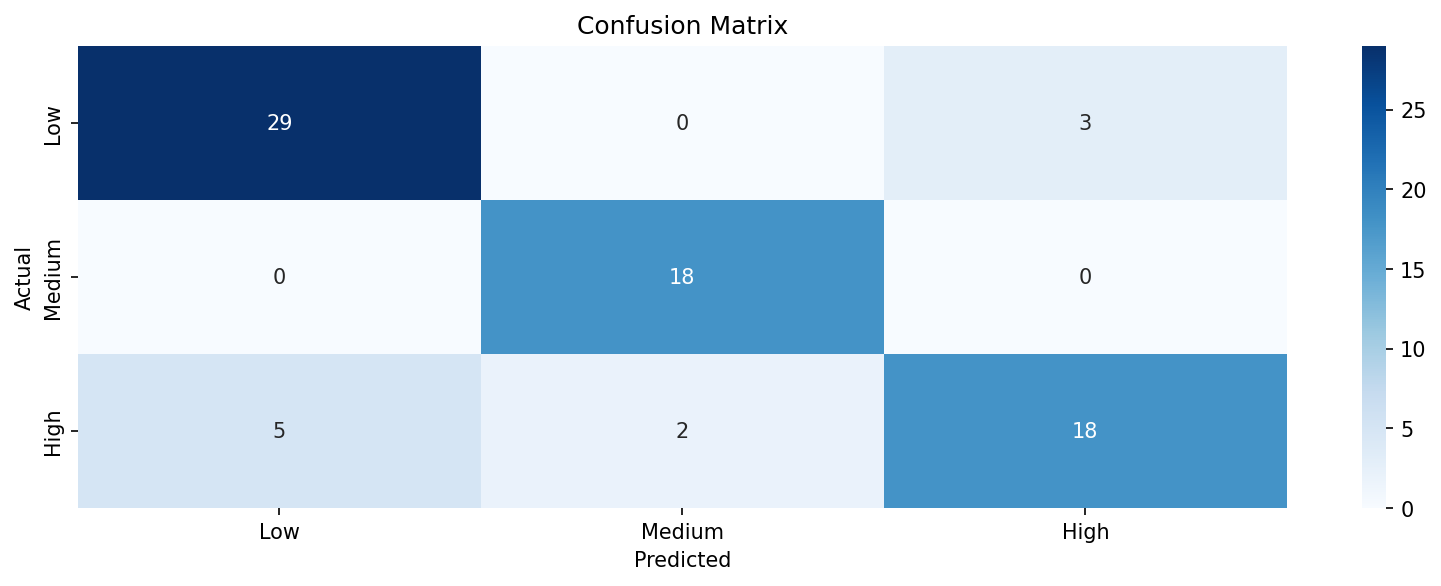

In [98]:
# Plot Confusion Matrix
plt.figure(figsize=(13,4), dpi=150)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Random Forest Classifier

In [101]:
# Standardize Features (Recommended but not mandatory for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [107]:
# Best Model
best_model = grid.best_estimator_

In [109]:
# Predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [113]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[29  0  3]
 [ 0 17  1]
 [ 3  3 19]]


In [141]:
print("\n🔹 Train Performance:")
print(f"  Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"  Precision: {precision_score(y_train, y_train_pred, average='weighted'):.2f}")
print(f"  Recall: {recall_score(y_train, y_train_pred, average='weighted'):.2f}")
print(f"  F1 Score: {f1_score(y_train, y_train_pred, average='weighted'):.2f}")

print("\n🔹 Test Performance:")
print(f"  Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print(f"  Precision: {precision_score(y_test, y_test_pred, average='weighted'):.2f}")
print(f"  Recall: {recall_score(y_test, y_test_pred, average='weighted'):.2f}")
print(f"  F1 Score: {f1_score(y_test, y_test_pred, average='weighted'):.2f}")


🔹 Train Performance:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00

🔹 Test Performance:
  Accuracy: 0.85
  Precision: 0.85
  Recall: 0.85
  F1 Score: 0.85


In [115]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.85      0.94      0.89        18
           2       0.83      0.76      0.79        25

    accuracy                           0.87        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.87      0.87      0.87        75



In [166]:
# Hyperparameter Tuning for Random Forest:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


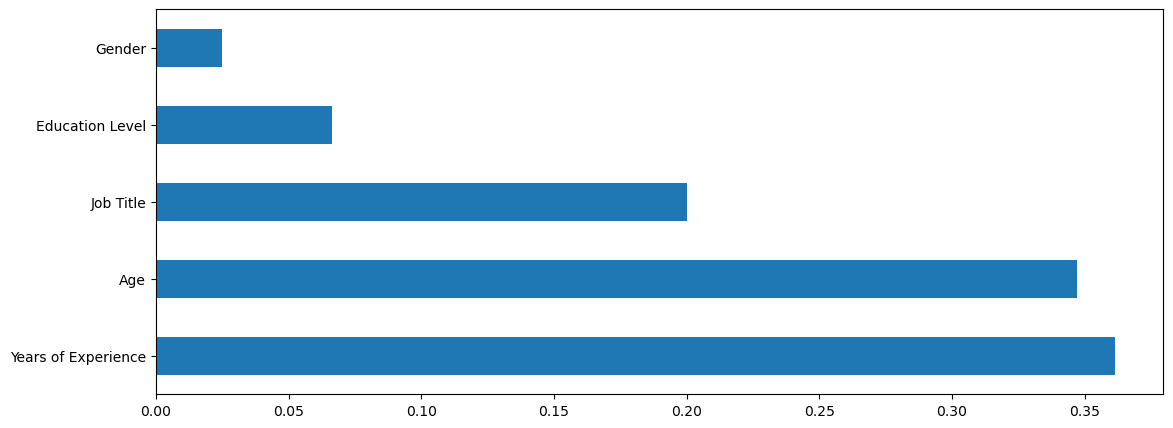

In [164]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh', figsize=(13,5))
plt.show()

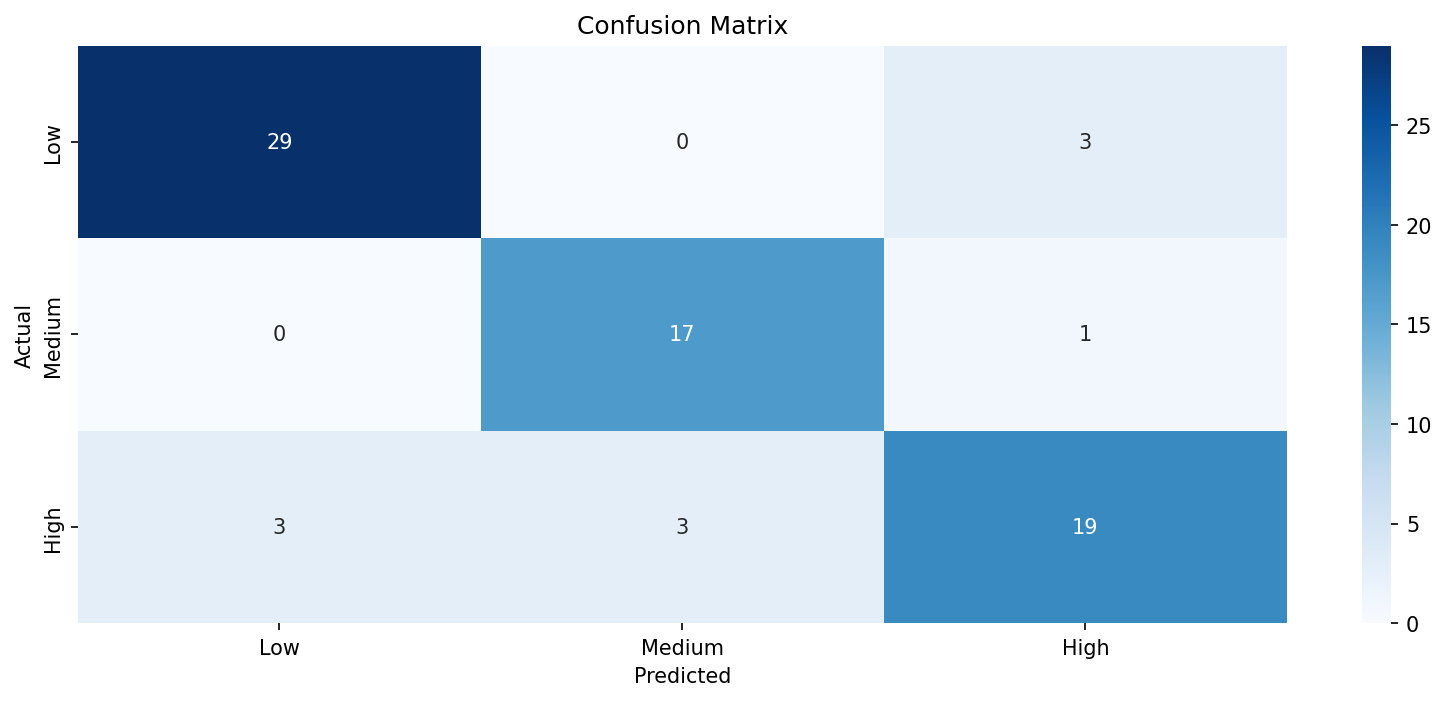

In [121]:
# Plot Confusion Matrix
plt.figure(figsize=(13,5), dpi=150)
sns.heatmap(cm, annot=True, fmt="dighted avg       0.87      0.87      0.86        75
", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Logistic Regression performed slightly better in Class 0 and Class 1, with a high precision and recall where interpretability matters.

### Random Forest Classifier had a higher macro precision and recall, meaning it handled imbalanced data better than Logistic Regression for handling complex patterns.

### Both Models have providing an accuracy of 87%.

# Model Fitting

In [168]:
# Initialize and fit Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [170]:
# Predictions
y_train_pred = rf_classifier.predict(X_train_scaled)
y_test_pred = rf_classifier.predict(X_test_scaled)

In [172]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'Salary_Prediction_model.pkl')

print("✅ Model saved successfully as 'Salary_Prediction_model.pkl'")

✅ Model saved successfully as 'Salary_Prediction_model.pkl'


In [178]:
X_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience
193,34.0,1,0,141,7.0
75,37.0,1,0,96,10.0
84,29.0,0,0,56,2.0
363,33.0,1,0,65,5.0
16,33.0,0,1,83,7.0


In [180]:
X_test.head()

,Age,Gender,Education Level,Job Title,Years of Experience
167,46.0,1,2,147,18.0
33,39.0,0,0,84,10.0
15,44.0,1,0,89,16.0
316,34.0,0,1,117,6.0
57,43.0,1,2,116,17.0


# Data Visualisation

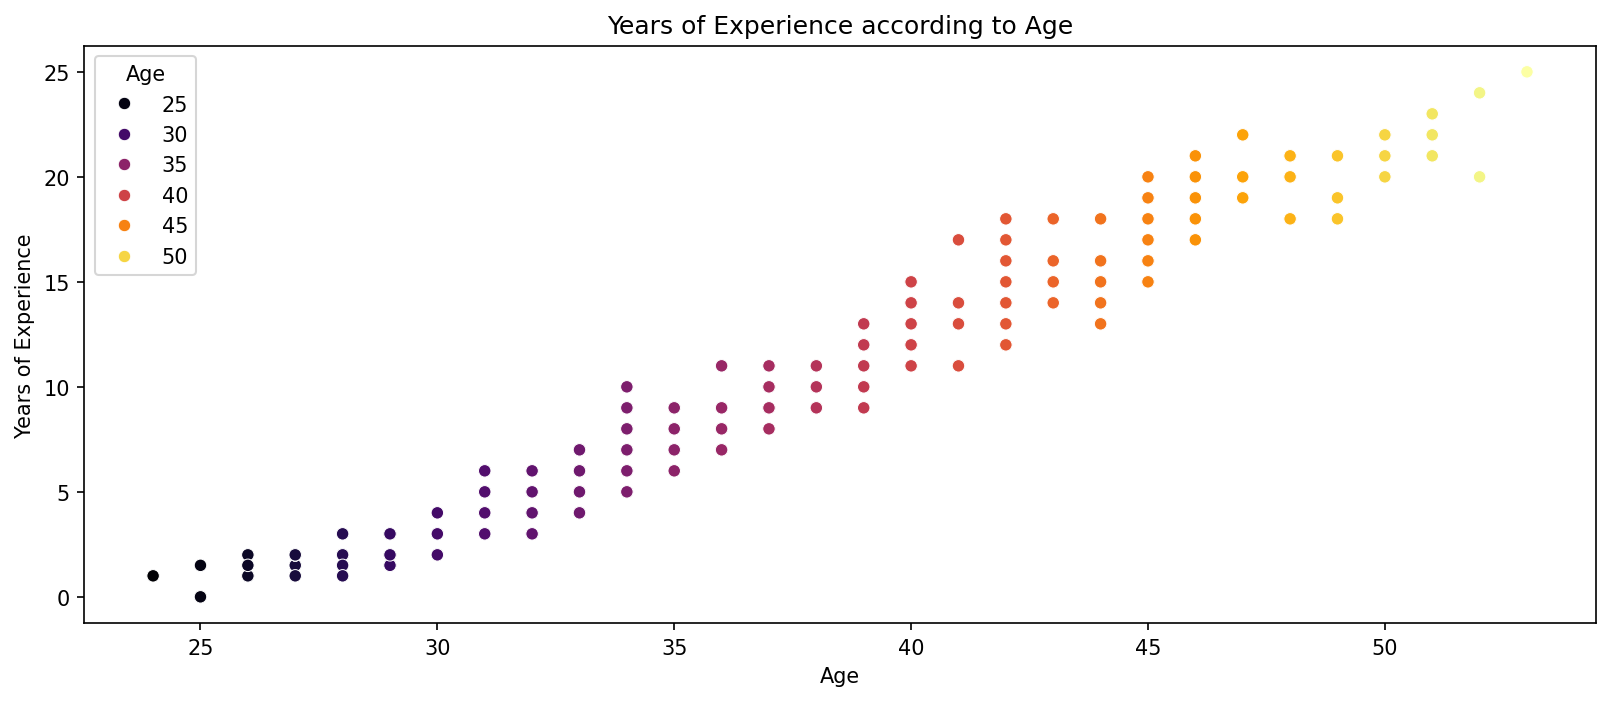

In [214]:
plt.figure(figsize=(13,5), dpi=150, edgecolor='k')
sns.scatterplot(data=X_train, x='Age', y='Years of Experience', hue='Age', palette='inferno')
plt.title("Years of Experience according to Age", fontsize=12)
plt.show()

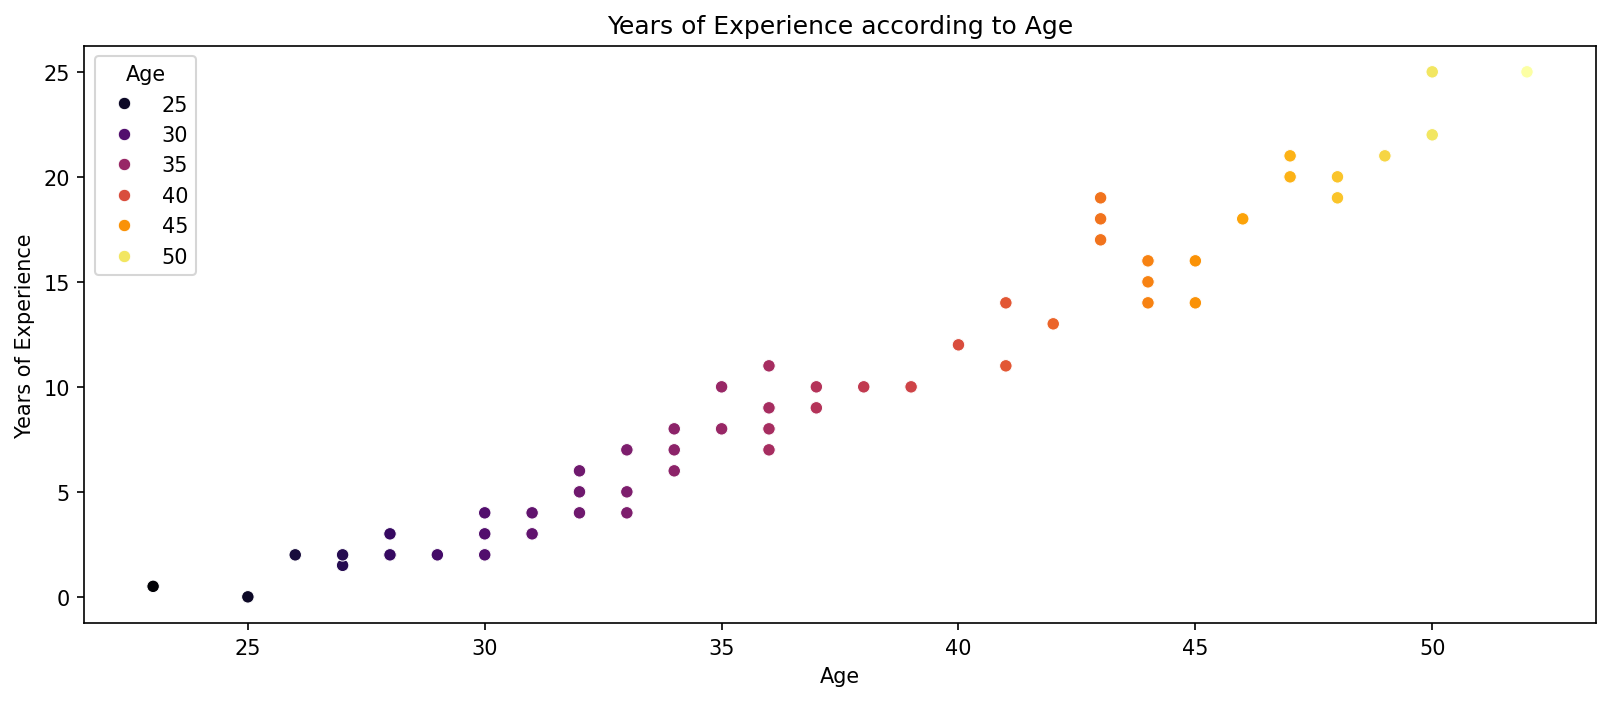

In [217]:
plt.figure(figsize=(13,5), dpi=150, edgecolor='k')
sns.scatterplot(data=X_test, x='Age', y='Years of Experience', hue='Age', palette='inferno')
plt.title("Years of Experience according to Age", fontsize=12)
plt.show()

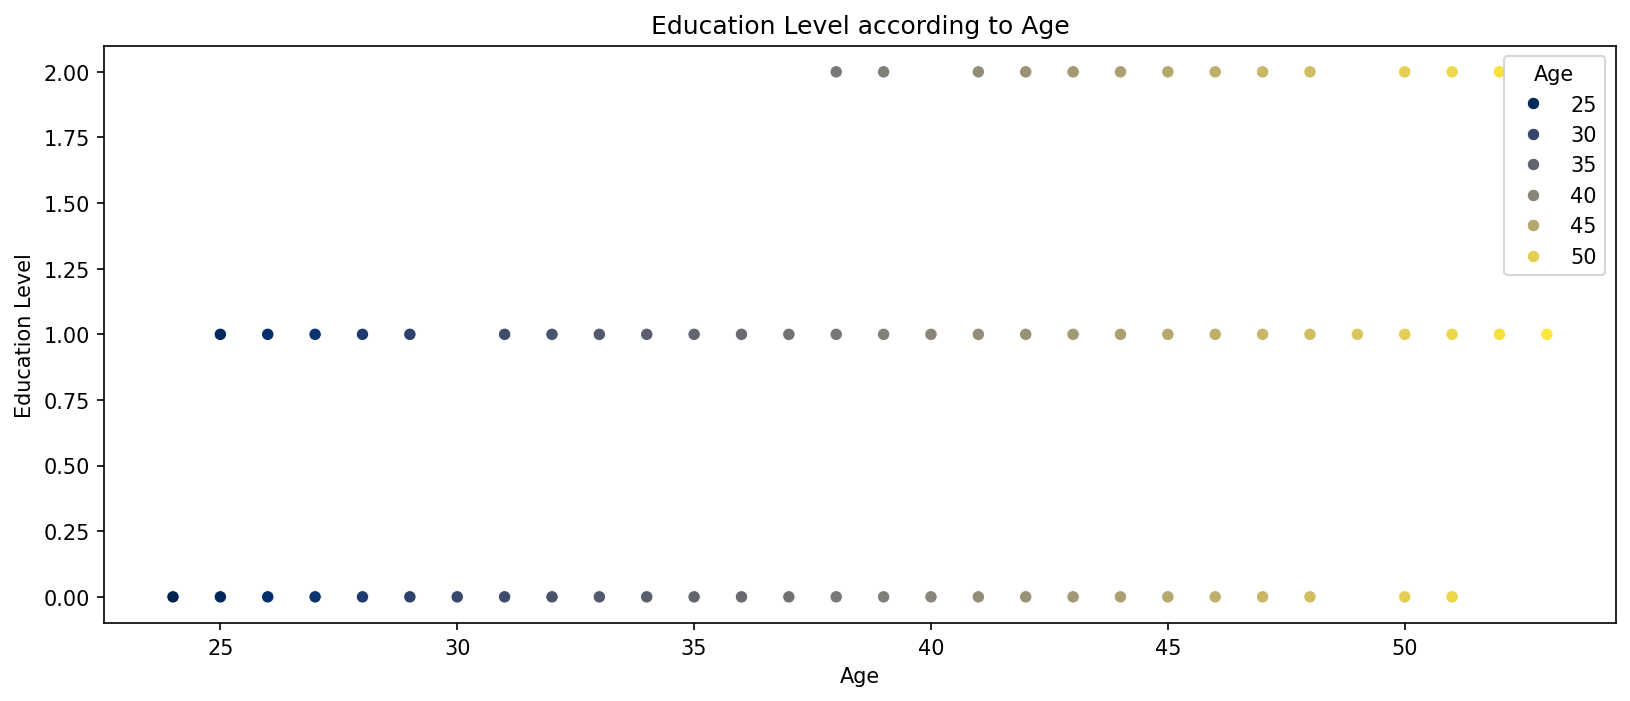

In [285]:
plt.figure(figsize=(13,5), dpi=150, edgecolor='k')
sns.scatterplot(data=X_train, x='Age', y='Education Level', hue='Age', palette='cividis')
plt.title("Education Level according to Age", fontsize=12)
plt.show()

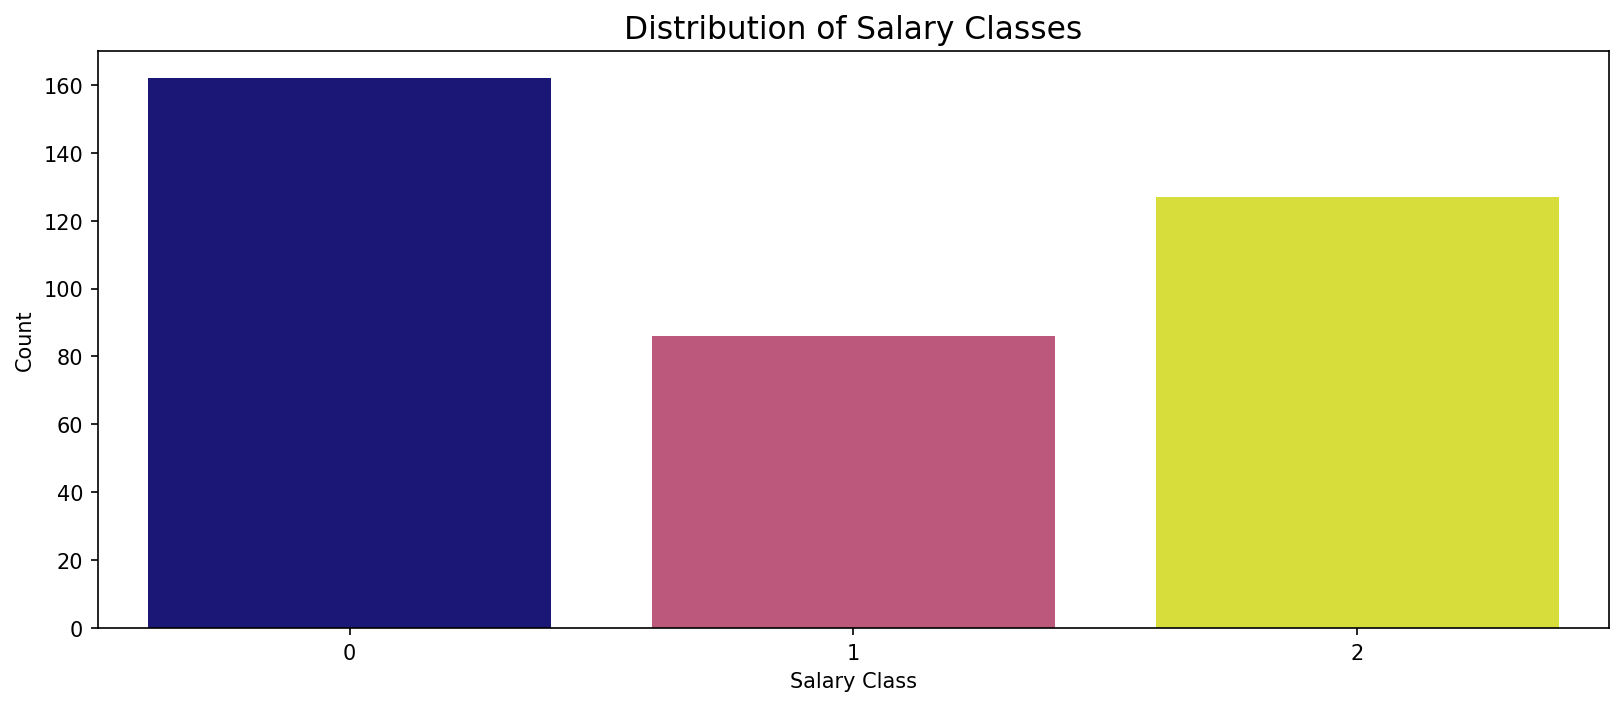

In [239]:
# Countplot for salary classes
plt.figure(figsize=(13, 5), dpi=150)
sns.countplot(x=data['Salary_Class'], hue=data['Salary_Class'], palette='plasma', legend=False)
plt.title("Distribution of Salary Classes", fontsize=15)
plt.xlabel("Salary Class")
plt.ylabel("Count")
plt.show()

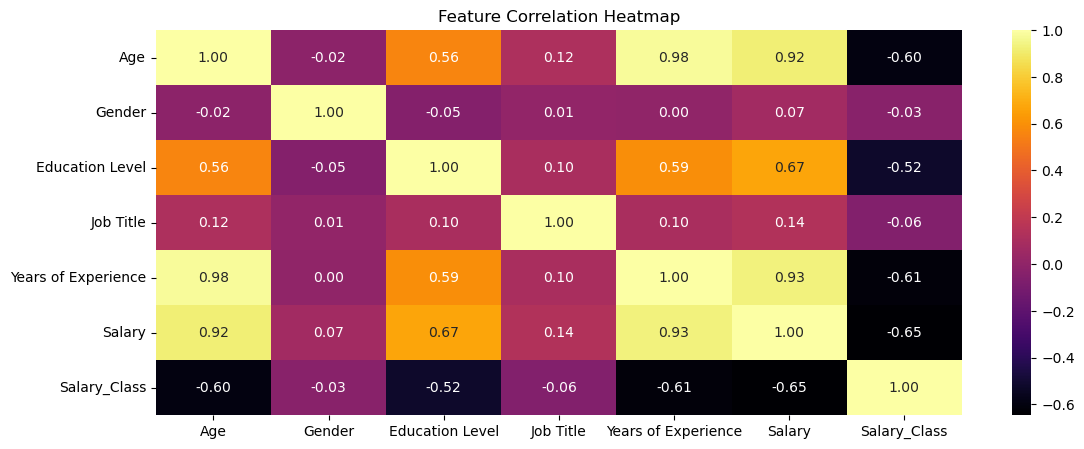

In [247]:
# Correlation Heatmap
plt.figure(figsize=(13, 5))
sns.heatmap(data.corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

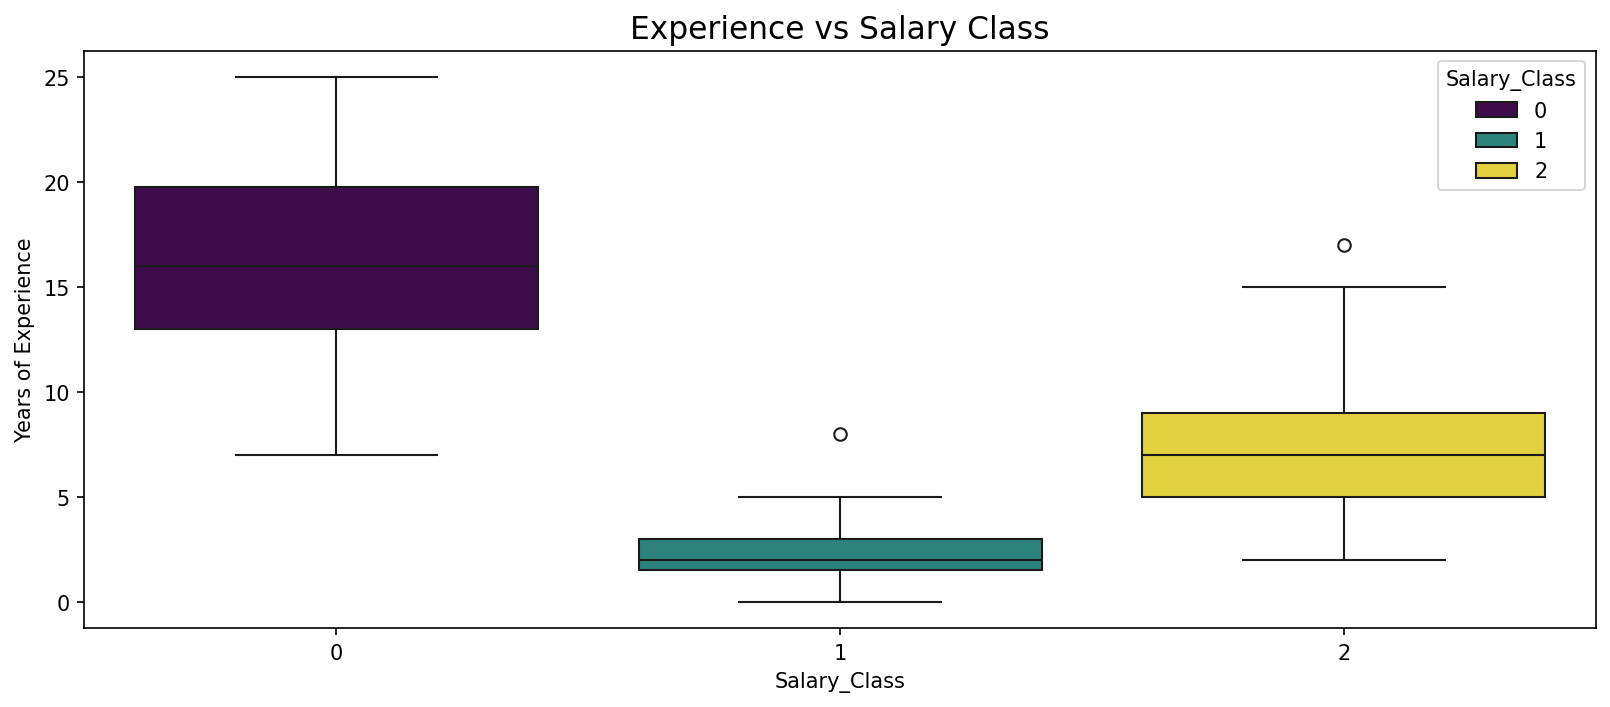

In [259]:
# Salary Class vs. Experience
plt.figure(figsize=(13, 5), dpi=150)
sns.boxplot(x='Salary_Class', y='Years of Experience', data=data, hue='Salary_Class', palette='viridis')
plt.title("Experience vs Salary Class", fontsize=15)
plt.show()

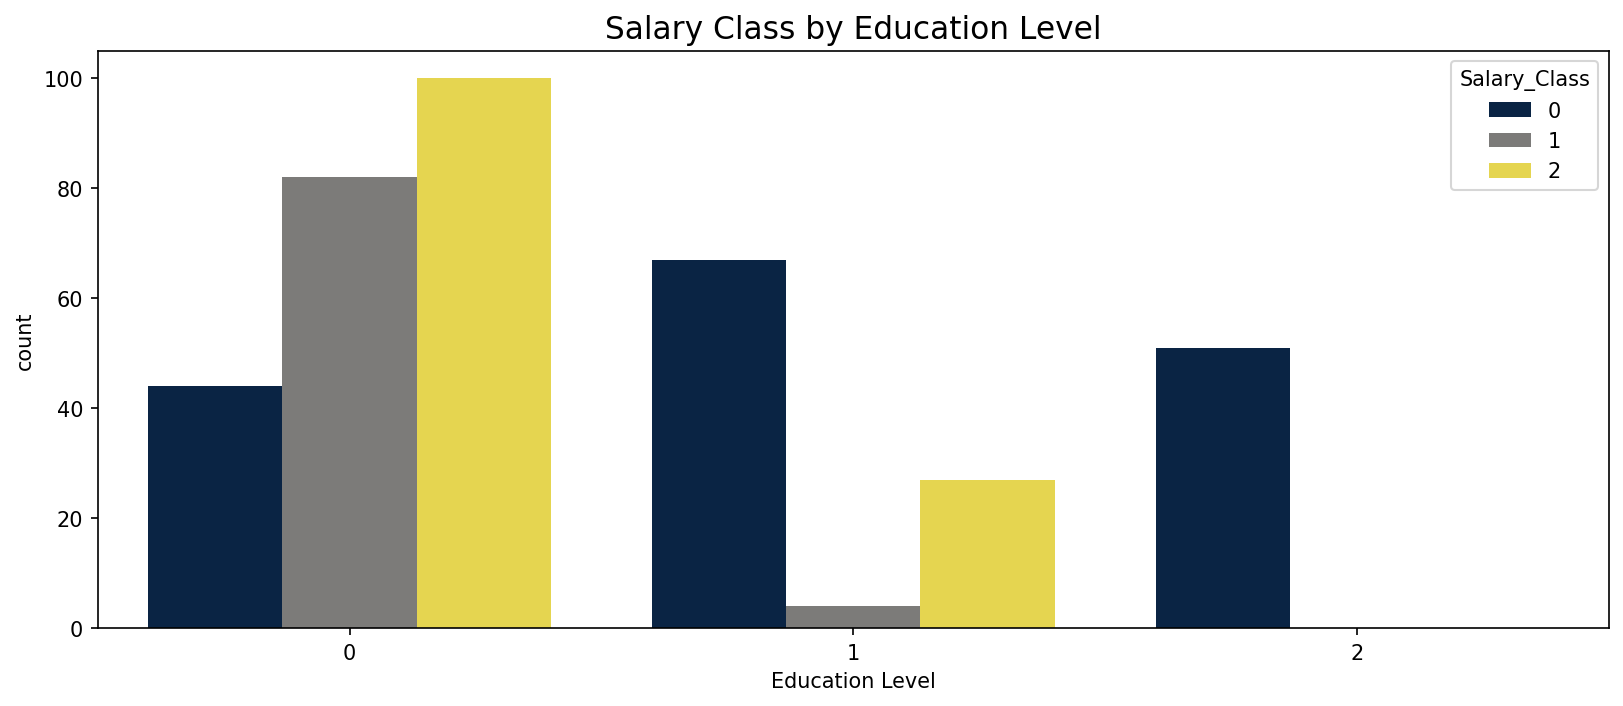

In [269]:
# Salary Class vs. Education Level
plt.figure(figsize=(13, 5), dpi=150)
sns.countplot(x='Education Level', hue='Salary_Class', data=data, palette='cividis')
plt.title("Salary Class by Education Level", fontsize=15)
plt.xticks(rotation=0)
plt.show()

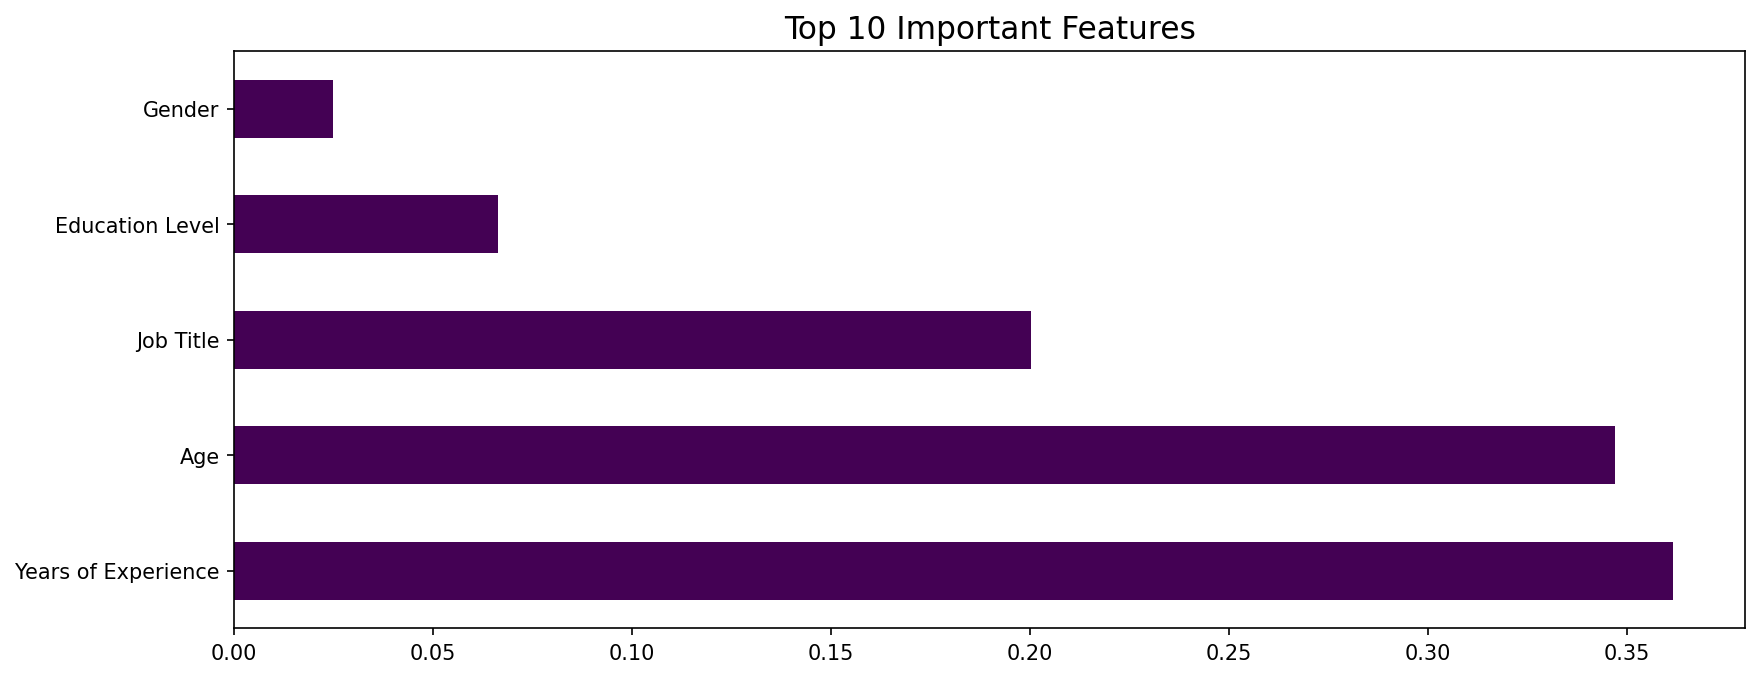

In [275]:
# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

# Plot top 10 features
plt.figure(figsize=(13, 5), dpi=150)
feature_importance.nlargest(10).plot(kind='barh', colormap='viridis')
plt.title("Top 10 Important Features", fontsize=15)
plt.show()